# Learning Boosting Methods using Liver Disease Data

This project focuses on visualizing and analysing liver disease data using Python. The primary objective of the project was to learn boosting techniques and implement the various boosting algorithms on this data set in Python. 

The data set was also particularly interesting to me because it was collected in Northern Andhra Pradesh in India, close to my hometown!

**Objectives for this study:**

1. Understand the relationships between predictors and response
2. Find the model that best predict the disease status
 - Learn boosting methods and implement them in python
3. Determine the most important variables for predicting liver disease

## Data Description

**Response:** Liver disease Yes or No (categorical)

**Predictors:** 

 - Age 
 - Gender
 - Total Bilirubin (Tot_Bil)
 - Direct Bilirubin (Dir_Bil)
 - Alkaline Phosphotase (Alk)
 - Alamine Aminotransferase (Ala)
 - Aspartate Aminotransferase (Asp)
 - Total Proteins (Tot_Pro)
 - Albumin (Alb)
 - Albumin and Globulin Ratio (AGR)
 
_Data Source: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._


## Analysis Process

This notebook can be split into the following sections:

- Data cleaning
- Exploratory data analysis
- Model building and evaluation
- Result interpretations

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #sets seaborn plots style globally
%matplotlib inline


### Data Cleaning

In [41]:
# Load data

df = pd.read_csv("./Indian Liver Patient Dataset.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
ID          583 non-null int64
Age         583 non-null int64
Gender      583 non-null object
Tot_Bil     583 non-null float64
Dir_Bil     583 non-null float64
Alk         583 non-null int64
Ala         583 non-null int64
Asp         583 non-null int64
Tot_Pro     583 non-null float64
Alb         583 non-null float64
AGR         579 non-null float64
Category    583 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 54.8+ KB


In [24]:
df.head(5)

,ID,Age,Gender,Tot_Bil,Dir_Bil,Alk,Ala,Asp,Tot_Pro,Alb,AGR,Category
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


We see that Gender is the only categorical predictor. All other predictors are numeric in nature. 

In [25]:
df.describe() # summary statistics for all the numeric columns

,ID,Age,Tot_Bil,Dir_Bil,Alk,Ala,Asp,Tot_Pro,Alb,AGR,Category
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,292.000000,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,168.441879,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,1.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,146.500000,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,292.000000,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,437.500000,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,583.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [26]:
df.isnull().sum()

ID          0
Age         0
Gender      0
Tot_Bil     0
Dir_Bil     0
Alk         0
Ala         0
Asp         0
Tot_Pro     0
Alb         0
AGR         4
Category    0
dtype: int64

There are 4 missing values in the AGR column, which is a small proportion of the total observations in the data. We can leave them in the dataset for now. 

## Exploratory Data Analysis

In this section, we examine the response as well as the predictors to understand the data better. We also try to gain insight into the relationships between predictors as well as between predictors and response. Visualizations are our main tool for this section. 

We will follow these steps:

- Univariate exploration - understand each variable on its own
- Bivariate exploration - understand relationships between variables

### Univariate Exploration

Number of patients diagnosed with liver disease:  416
Number of patients diagnosed with no liver disease:  167


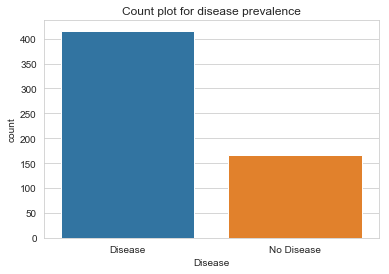

In [43]:
# Response is disease status - Categorical
# Category is 1 indicates 'disease' and 2 indicates 'no disease'

rename = {1: "Disease", 2: "No Disease"}
df.replace({"Category": rename}, inplace=True)

df = df.rename({'Category': 'Disease'}, axis = 1)

sns.countplot(x = 'Disease', label = 'Count', data = df)
plt.title("Count plot for disease prevalence")

LD, NLD = df['Disease'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients diagnosed with no liver disease: ',NLD)


Number of Males:    441
Number of Females:  142


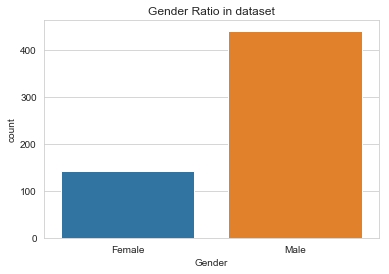

In [28]:
# Gender is the only other categorical variable. 

sns.countplot(x = 'Gender', label = 'Count', data = df)
plt.title("Gender Ratio in dataset")

male, female = df['Gender'].value_counts()
print('Number of Males:   ',male)
print('Number of Females: ',female)

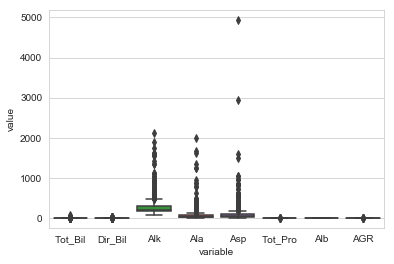

In [29]:
# Exploring Numerical Variables

sns.boxplot(x = "variable", y = "value", data = pd.melt(df.iloc[:,3:11]))


There is a huge disparity in the range of variables from one to another. Asp has values from 100 to ~5000 whereas AGR is between 0.9 and 2.2. 

We need to standarize the variables so they have similar ranges. This will help understand the effect of different variables in evental model building. 

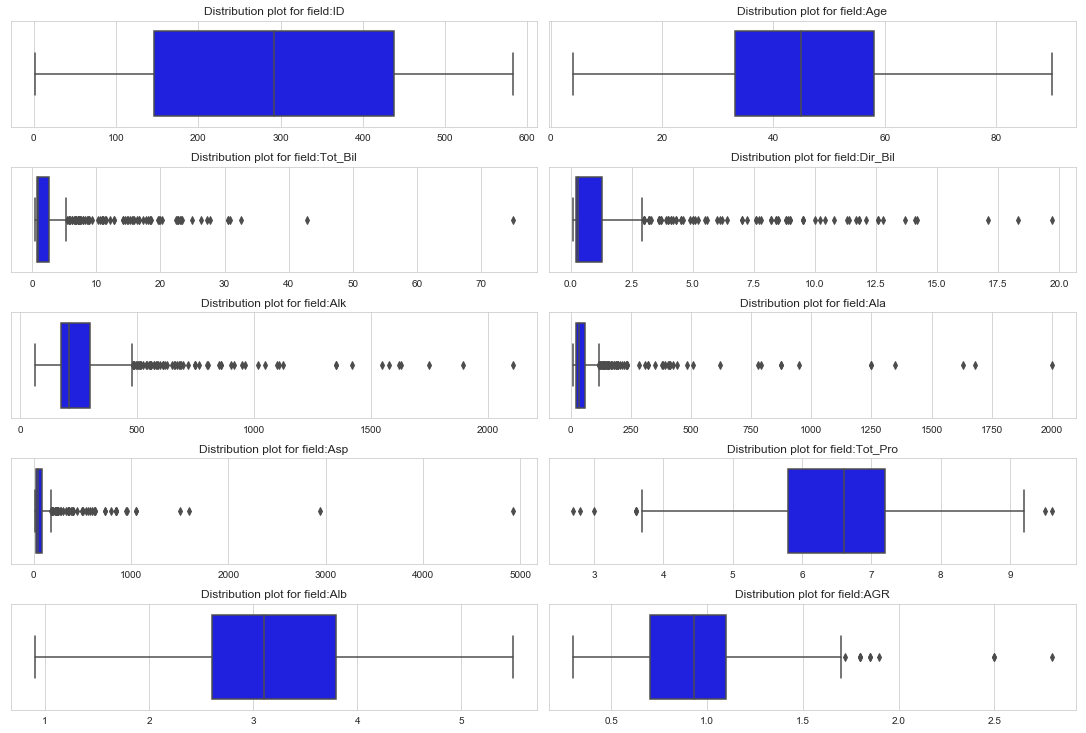

In [30]:
# outlier check

plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('Disease', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i+1)
    sns.boxplot(x = df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

The boxplots for each variable show several unusual observations! We need to address this before we fit any models. 

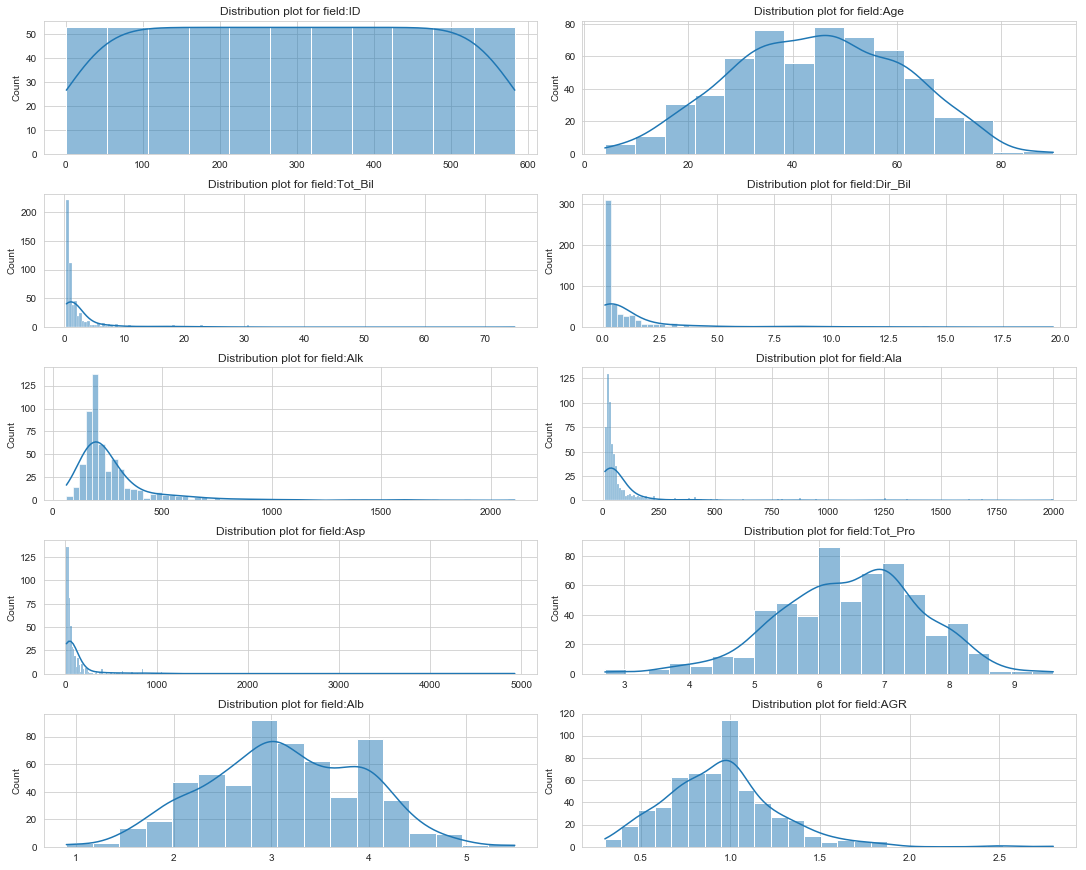

In [31]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.histplot(x = df[c], kde = True)
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Bivariate Exploration

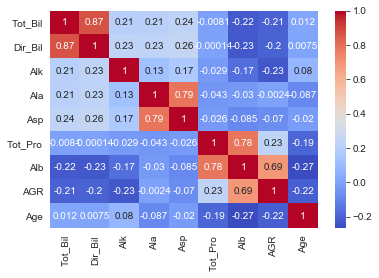

In [32]:
# Pairwise correlation between continuous variables

df_cts = df.iloc[:, 3:11]
df_cts['Age'] = df['Age']
sns.heatmap(df_cts.corr(), cmap = "coolwarm", annot = True)


The heatmap of the correlation plot shows some very interesting patterns. We see that the following pairs have high pairwise correaltion:

- Total and Direct Bilirubin
- Alamine and Aspartate
- Total Protein and Albumin
- Albumin and AGR

These high-correlations indicate that we may have redundant information among the available predictor set and may need some feature selection or feature engineering before model fitting. 

The pairwise correlations can also be examined using scatterplots.

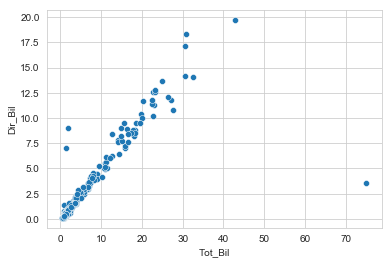

In [33]:
# Visualize high correlations using scatter plots

sns.scatterplot(x = "Tot_Bil", y = "Dir_Bil", data = df)

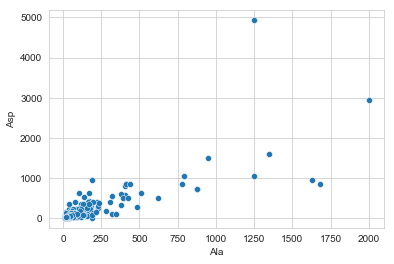

In [34]:
sns.scatterplot(x = "Ala", y = "Asp", data = df)

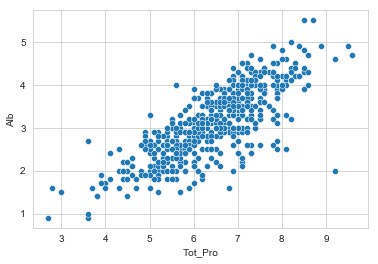

In [35]:
sns.scatterplot(x = "Tot_Pro", y = "Alb", data = df)

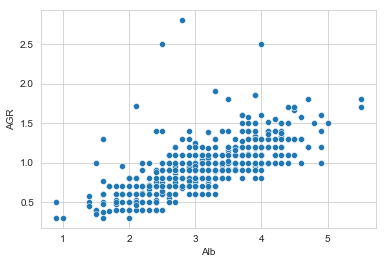

In [36]:
sns.scatterplot(x = "Alb", y = "AGR", data = df)

In [37]:
#Examning relationship between predictors and response

contingency = pd.crosstab(df['Gender'], df['Disease']) 
contingency_pct = pd.crosstab(df['Gender'], df['Disease'], normalize='index') 
contingency

Disease,Disease,No Disease
Gender,,
Female,92,50
Male,324,117


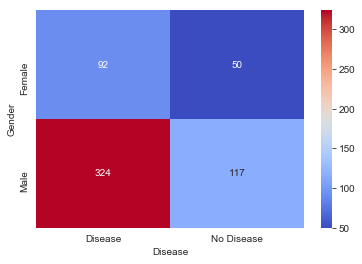

In [38]:
sns.heatmap(contingency, annot = True, cmap = 'coolwarm', fmt='g')

In [39]:
# Run chi square test of independence between disease status and Gender

from scipy.stats import chi2_contingency

chi2_value, p_value, df, expected = chi2_contingency(contingency)
p_value

0.059665846857774464

The null hypothesis is that there is no relationship between disease status and gender. The chi-square test indicates that we do not have sufficient evidence to reject the null hypothesis at a 0.05 significance level. In other words, we don't have evidence to conclude that gender and disease status are not independent. 

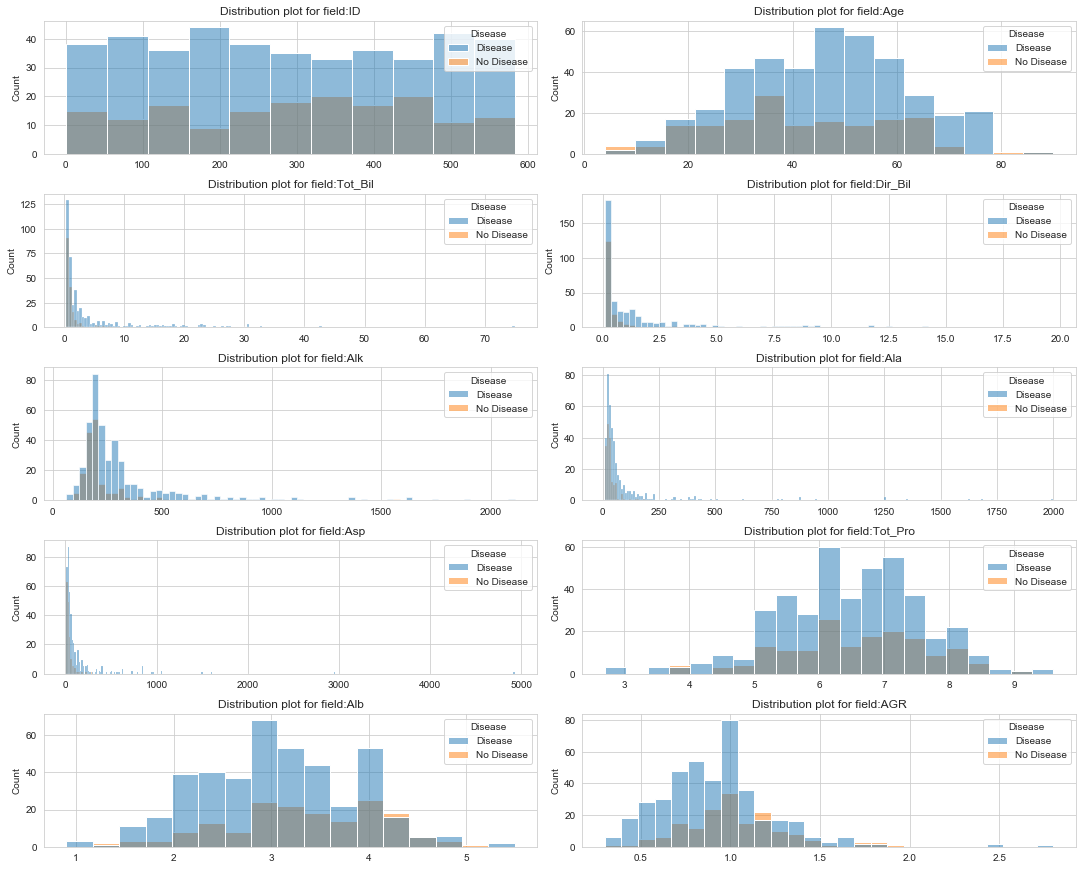

In [44]:
# Disease status vs Predictors

plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.histplot(x = df[c], data = df, hue = 'Disease')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

** Major takeaways from EDA **

1. The response - disease status - is imbalanced, i.e., the proportion of disease to healthy subjects is not 50/50. We may need to address this if our initial models have poor performance. 

2. There are many influential points in the data. Influential points are observations that have unusual predictor value compared to the rest of the observations. 

3. Some predictors have very high pairwise correlation with other predictors. 

4. Disease status does not seem to be associated with gender. 

### Data Cleaning and Feature Engineering

In this step, we examine the data for missing values and handle them. We also make decisions on how to handle high-correlated predictors. 

In [45]:
#missing values by column

df.isnull().sum()

ID         0
Age        0
Gender     0
Tot_Bil    0
Dir_Bil    0
Alk        0
Ala        0
Asp        0
Tot_Pro    0
Alb        0
AGR        4
Disease    0
dtype: int64

There are only 4 missing values, all of which are in the AGR column. From EDA, we know that AGR is highly correlated with Alb. We use this information to impute there 4 missing values. 

We use simple linear regression between Alb and AGR to predict the missing values. 

In [46]:
na_ids = df['AGR'][df['AGR'].isnull()].index.tolist()

In [47]:
X = df['Alb'].values.reshape((-1,1))
X = np.delete(X, na_ids)
X = X.reshape((-1,1))
Y = df['AGR'].values.reshape((-1,1))
Y = np.delete(Y, na_ids)
Y = Y.reshape((-1,1))

In [48]:
# regression between Alb and AGR

from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

lm1.fit(X, Y)
AGR_pred_nas = lm1.predict(df['Alb'].values.reshape((-1,1))[na_ids])
df['AGR'][na_ids] = AGR_pred_nas.reshape((-1,))

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [49]:
df.isnull().sum()

ID         0
Age        0
Gender     0
Tot_Bil    0
Dir_Bil    0
Alk        0
Ala        0
Asp        0
Tot_Pro    0
Alb        0
AGR        0
Disease    0
dtype: int64

Now, we have no missing values in the dataset

** Correlated predictors **

Earlier we saw that some of the predictors were highly correlated with each other. In order to remove one of the predictors in the pair, we compute the average correlation of both predictors with all other predictors. The predictor that has higher average correlation is removed. 

In [50]:
corr_mat = df_cts.corr()
corr_mat

,Tot_Bil,Dir_Bil,Alk,Ala,Asp,Tot_Pro,Alb,AGR,Age
Tot_Bil,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.011763
Dir_Bil,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.007529
Alk,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.080425
Ala,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.086883
Asp,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.019910
Tot_Pro,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.187461
Alb,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.265924
AGR,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.216408
Age,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,1.000000


In [51]:
# Tot_Bil vs Dir_Bil

print(np.mean(corr_mat['Tot_Bil'][2:]))
print(np.mean(corr_mat['Dir_Bil'][2:])) #higher average correaltion

0.03338722488680298
0.043587411408625064


In [52]:
# Ala vs Asp

print(np.mean(corr_mat['Ala'][np.array([0,1,2, 5,6,7,8])]))
print(np.mean(corr_mat['Asp'][np.array([0,1,2, 5,6,7,8])])) #higher average correaltion

0.05887444757464074
0.06595512138400036


In [53]:
# Tot_Pro vs Alb

print(np.mean(corr_mat['Tot_Pro'][np.array([0,1,2, 3,4,7,8])]))#higher average correaltion
print(np.mean(corr_mat['Alb'][np.array([0,1,2, 3,4,7,8])])) 

-0.00821286801493888
-0.043936834209195266


In [54]:
# Alb vs AGR

print(np.mean(corr_mat['Alb'][np.array([0,1,2, 3,4,7,8])]))
print(np.mean(corr_mat['AGR'][np.array([0,1,2, 3,4,7,8])])) #higher average correaltion

-0.043936834209195266
0.010088352192507862


Based on the results, we retain the following predictors for model building:

 - Age 
 - Gender
 - Total Bilirubin (Tot_Bil)
 - Alkaline Phosphotase (Alk)
 - Alamine Aminotransferase (Ala)
 - Albumin (Alb)
 

In [55]:
# Change gender to 0/1 variable

sex = pd.get_dummies(df['Gender'], drop_first=True)

In [56]:
df = pd.concat([df, sex], axis = 1)

df.drop(['Gender'], axis = 1, inplace = True)

In [57]:
# Change Disease to 0/1 variable - 1 means disease; 0 means no disease
rename = {"Disease": 1, "No Disease": 0}
df.replace({"Disease": rename}, inplace=True)

In [58]:
X = df[['Age', 'Male', 'Tot_Bil', 'Alk', 'Ala', 'Alb']]
y = df['Disease']

** Data Balancing **

Our response is imbalanced with 1/0 ratio of approximately 75/25. There are several strategies for dealing with class imbalance including under-sampling majority class, over-sampling miniority class and SMOTE. SMOTE is a popular method that relies on creating synthetic observations based on nearest neighbor observations to balance the class proportions. A random observation in the minority class is first picked, and a random neighbor is elected. Then, a synthetic observation is created at a randomly selected point in between the two observations in the feature space. 

We use the imbalanced-learn package to implement SMOTE in Python

In [59]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [60]:
from collections import Counter

Counter(y_smote)

Counter({1: 416, 0: 416})

Now we have an equal number of 0's and 1's in the data set!

## Model Building

First, we need to split our data into train and test data sets. Then, we scale both data sets using scalers fit to just the training set. 

Next, we fit the following models:
- Logistic regression
- Support vector machines
- Random forests
- XGBoost

We will compare the various fit metrics for each model and determine which models provide best fit for this dataset. 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [62]:
# Create train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size= 0.2, random_state=42) 

In [63]:
print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)

Train values shape: (665, 6)
Test values shape: (167, 6)


In [64]:
# Variable scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [83]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_train_hat = logistic.predict(X_train)
y_test_hat = logistic.predict(X_test)
log_auc = roc_auc_score(y_test, y_test_hat)

In [66]:
print('-----------------------')
print("Logistic Regression")
print('-----------------------')
print(classification_report(y_test, y_test_hat))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_hat))
print('')
print("AUC Score")
print(roc_auc_score(y_test, y_test_hat))

-----------------------
Logistic Regression
-----------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        92
           1       0.79      0.72      0.76        75

    accuracy                           0.79       167
   macro avg       0.79      0.78      0.79       167
weighted avg       0.79      0.79      0.79       167


Confusion Matrix
[[78 14]
 [21 54]]

AUC Score
0.7839130434782609


The logisitic regression has an F score of 0.79 and AUC score of 0.784. 

#### Support Vector Machines

In [67]:
model = SVC()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
svc_auc = roc_auc_score(y_test, y_test_hat)

In [68]:
print('-----------------------')
print("Support Vector Classifier")
print('-----------------------')
print(classification_report(y_test, y_test_hat))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_hat))
print('')
print("AUC Score")
print(roc_auc_score(y_test, y_test_hat))

-----------------------
Support Vector Classifier
-----------------------
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        92
           1       0.81      0.57      0.67        75

    accuracy                           0.75       167
   macro avg       0.77      0.73      0.73       167
weighted avg       0.76      0.75      0.74       167


Confusion Matrix
[[82 10]
 [32 43]]

AUC Score
0.7323188405797101


SVM had worse performance accuracy than logistic regression. We will explore tree based model such as random forest and XGBoost next!

#### Random Forest

In [69]:
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train, y_train)

y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

In [70]:
print('-----------------------')
print("Random Forest")
print('-----------------------')
print(classification_report(y_test, y_test_hat))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_hat))
print('')
print("AUC Score")
print(roc_auc_score(y_test, y_test_hat))

-----------------------
Random Forest
-----------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        92
           1       0.77      0.80      0.78        75

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167


Confusion Matrix
[[74 18]
 [15 60]]

AUC Score
0.8021739130434783


The random forest method has an F score of 0.80 and AUC score 0f 0.802. 

We can search hyperparameter space to find best random forest model for this data!

In [71]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_jobs=-1, cv=3, n_iter = 100, verbose = 2, scoring='roc_auc', random_state = 101)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.80851355 0.82845668 0.78128181        nan 0.78047834
 0.80406434 0.83824496 0.84138134 0.77814148 0.79590456 0.82356087
 0.82858367 0.79401347 0.79922722 0.82538033        nan        nan
 0.84367531 0.78036944 0.81123699 0.77931584 0.81176984        nan
 0.84889122 0.77793663 0.84948876        nan 0.77949469 0.78035722
 0.79436099        nan 0.81444824        nan 0.84107178        nan
 0.81999622        nan        nan        nan 0.79420849 0.84052372
 0.80845414 0.82601501 0.84259295 0.83707168        nan 0.81469598
 0.81145526 0.84931925 0.83880081 0.82918049 0.80919232 0.79563119
 0.83499251 0.84157624 0.795975   0.79738404 0.82082809        nan
 0.81100147 0.82098646        nan 0.79165948 0.79643885 0.80909648
        nan        nan 0.83635818        nan 0.78101825 0.81757467
 0.78199675 0.79361239 0.81164837 0.81774262        n

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_leaf_nodes': [4, 10, 20, 50, None],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [1, 2, 4, 5],
                                        'n_estimators': [100, 200, 500]},
                   random_state=101, scoring='roc_auc', verbose=2)

In [72]:
best_random = rf_random.best_estimator_
random_predict = best_random.predict(X_test)
rf_auc = roc_auc_score(y_test, random_predict)

In [73]:
print('-----------------------')
print("Best Random Forest")
print('-----------------------')
print(classification_report(y_test, random_predict))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, random_predict))
print('')
print("AUC Score")
print(roc_auc_score(y_test, random_predict))

-----------------------
Best Random Forest
-----------------------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        92
           1       0.76      0.81      0.79        75

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167


Confusion Matrix
[[73 19]
 [14 61]]

AUC Score
0.8034057971014492


The best random forest method has an F score of 0.80 and AUC score 0f 0.803.
We had only a very marginal improvement of 0.001 in AUC score through hyperparameter tuning!

#### XGBoost

Random forests are one approach to ensemble tree based models where several trees are grown in parallel and their performance is averaged. 

Boosting is the other approach to ensemble tree based models where trees are grown in a sequential manner. Each tree tries to improve or correct the mistakes made by the previous tree. Each tree is fairly shallow to avoid issues of overfitting!

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 101, use_label_encoder=False)
xgb.fit(X_train, y_train)

y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

[15:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
print('-----------------------')
print("XGBoost Classifier")
print('-----------------------')
print(classification_report(y_test, y_test_hat))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_hat))
print('')
print("AUC Score")
print(roc_auc_score(y_test, y_test_hat))

-----------------------
XGBoost Classifier
-----------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        92
           1       0.77      0.80      0.78        75

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167


Confusion Matrix
[[74 18]
 [15 60]]

AUC Score
0.8021739130434783


Interestingly, XGBoost had identical classification performance as the best random forest model!

We can perform hyperparameter tuning to see if we can imporve the performance of the default XGBoost model. 

In [76]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xgb_random = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions = random_grid, n_jobs=-1, cv=3, n_iter = 100, verbose = 2, scoring='roc_auc', random_state = 101)
xgb_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.79023499 0.81820839        nan 0.83524623        nan 0.85563261
 0.85264801 0.5        0.5        0.5        0.5        0.81731424
 0.82780332        nan        nan 0.5        0.5               nan
        nan 0.84835525        nan 0.82760134 0.81243232 0.78864578
        nan 0.80874165        nan 0.5        0.5        0.80892721
        nan        nan        nan 0.8532882         nan 0.5
        nan 0.76521263        nan 0.77860617 0.5        0.5
        nan 0.5        0.83540844 0.78941978        nan        nan
 0.78736468        nan 0.82351547        nan        nan        nan
        nan 0.76458323 0.5        0.83461898 0.84783725 0.8091801
 0.78227923 0.8437527  0.85778175        nan 0.76431153        nan
 0.8217565  0.8517426  0.5               nan 0.5               nan
        nan 0.5               nan        nan        nan        nan
 

[15:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [77]:
best_random = xgb_random.best_estimator_
random_predict = best_random.predict(X_test)
xgb_auc = roc_auc_score(y_test, random_predict)

In [78]:
print('-----------------------')
print("Best XGBoost")
print('-----------------------')
print(classification_report(y_test, random_predict))
print('')
print("Confusion Matrix")
print(confusion_matrix(y_test, random_predict))
print('')
print("AUC Score")
print(roc_auc_score(y_test, random_predict))

-----------------------
Best XGBoost
-----------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        92
           1       0.82      0.83      0.82        75

    accuracy                           0.84       167
   macro avg       0.84      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167


Confusion Matrix
[[78 14]
 [13 62]]

AUC Score
0.8372463768115942


The best XGBoost Classifier had a slight imporvement over the base XGBoost and the best random forest model!!

We acheieved an F-score of 0.84 and a AUC score of 0.837. 

## Result and Summary

In this project, we examined a liver disease data set collected in India. 
We explored the data using visualizations, then cleaned the data and performed feature engineering. 
We addressed the class imbalance in the response using SMOTE. 
Finally, we fit 4 different classifiers and their results are summarized below!

Overall, XGBoost had the best classification accuracy with an AUC score of 0.837. 

In [105]:
results = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Classifier','Random Forest Classifier', 'XGBoost'],
                        'AUC Score': [log_auc, svc_auc, rf_auc, xgb_auc]})
df_results = results.sort_values(by='AUC Score', ascending=False)
df_results = df_results.reset_index(drop = True)
df_results

,Model,AUC Score
0,XGBoost,0.837246
1,Random Forest Classifier,0.803406
2,Logistic Regression,0.783913
3,Support Vector Classifier,0.732319


The results can be visualized using a barplot for easy interpretation!

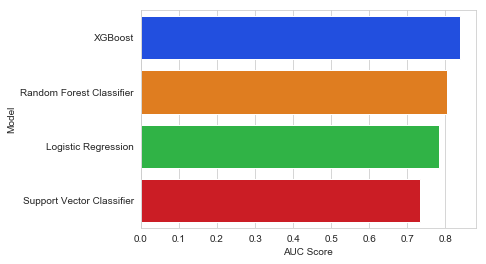

In [104]:
sns.barplot(y = 'Model', x = 'AUC Score', data = df_results, orient='h', palette='bright')